In [17]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_97b32920e033492f91b7c1fa18bdebdd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Kh0huOv-bxGmfPKzwhv3_HmdOfH0Qf6mCi6E3SeCJiYi',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_97b32920e033492f91b7c1fa18bdebdd.get_object(Bucket='winds-donotdelete-pr-s2msoiihezp7lk',Key='modified.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()



,WindGustSpeed,WindSpeed9am,WindSpeed3pm,hours
0,30.0,6.0,20,5
1,39.0,4.0,17,5
2,85.0,6.0,6,1
3,54.0,30.0,24,3
4,50.0,20.0,28,3


In [18]:
X = dataset.iloc[:, 0:3].values
y = dataset.iloc[:,3].values




In [19]:
X


array([[ 30.,   6.,  20.],
       [ 39.,   4.,  17.],
       [ 85.,   6.,   6.],
       ..., 
       [ 43.,  11.,   9.],
       [ 46.,   6.,  28.],
       [ 78.,  31.,  35.]])

In [20]:
y


array([5, 5, 1, 3, 3, 4, 4, 4, 4, 5, 5, 4, 3, 4, 4, 4, 3, 4, 5, 4, 5, 4, 6,
       6, 4, 4, 3, 2, 3, 3, 4, 4, 5, 5, 4, 3, 5, 4, 4, 3, 5, 4, 5, 5, 4, 5,
       4, 5, 6, 5, 4, 0, 5, 4, 4, 4, 1, 6, 5, 5, 5, 5, 4, 3, 4, 5, 5, 5, 4,
       5, 5, 3, 3, 3, 3, 5, 3, 4, 5, 5, 4, 3, 5, 6, 5, 4, 6, 5, 5, 1, 3, 3,
       4, 4, 4, 4, 5, 5, 4, 3, 4, 4, 4, 3, 4, 5, 4, 5, 4, 6, 6, 4, 4, 3, 2,
       3, 3, 4, 4, 5, 5, 4, 3, 5, 4, 4, 3, 5, 4, 5, 5, 4, 5, 4, 5, 6, 5, 4,
       0, 5, 4, 4, 4, 1, 6, 5, 5, 5, 5, 4, 3, 4, 5, 5, 5, 4, 5, 5, 3, 3, 3,
       3, 5, 3, 4, 5, 5, 4, 3, 5, 6, 5, 4, 6, 5, 5, 1, 3, 3, 4, 4, 4, 4, 5,
       5, 4, 3, 4, 4, 4, 3, 4, 5, 4, 5, 4, 6, 6, 4, 4, 3, 2, 3, 3, 4, 4, 5,
       5, 4, 3, 5, 4, 4, 3, 5, 4, 5, 5, 4, 5, 4, 5, 6, 5, 4, 0, 5, 4, 4, 4,
       1, 6, 5, 5, 5, 5, 4, 3, 4, 5, 5, 5, 4, 5, 5, 3, 3, 3, 3, 5, 3, 4, 5,
       5, 4, 3, 5, 6, 5, 4, 6, 5, 5, 1, 3, 3, 4, 4, 4, 4, 5, 5, 4, 3, 4, 4,
       4, 3, 4, 5, 4, 5, 4, 6, 6, 4, 4, 3, 2, 3, 3, 4, 4, 5, 5, 4, 3, 5, 4,
       4, 3,

In [21]:
dataset['WindGustSpeed'].fillna(value=dataset['WindGustSpeed'].mean(),inplace=True)
dataset['WindSpeed9am'].fillna(value=dataset['WindSpeed9am'].mean(),inplace=True)
dataset['WindSpeed3pm'].fillna(value=dataset['WindSpeed3pm'].mean(),inplace=True)

X = dataset.iloc[:, 0:3].values
y = dataset.iloc[:,3].values


In [22]:
X

array([[ 30.,   6.,  20.],
       [ 39.,   4.,  17.],
       [ 85.,   6.,   6.],
       ..., 
       [ 43.,  11.,   9.],
       [ 46.,   6.,  28.],
       [ 78.,  31.,  35.]])

In [23]:
y


array([5, 5, 1, 3, 3, 4, 4, 4, 4, 5, 5, 4, 3, 4, 4, 4, 3, 4, 5, 4, 5, 4, 6,
       6, 4, 4, 3, 2, 3, 3, 4, 4, 5, 5, 4, 3, 5, 4, 4, 3, 5, 4, 5, 5, 4, 5,
       4, 5, 6, 5, 4, 0, 5, 4, 4, 4, 1, 6, 5, 5, 5, 5, 4, 3, 4, 5, 5, 5, 4,
       5, 5, 3, 3, 3, 3, 5, 3, 4, 5, 5, 4, 3, 5, 6, 5, 4, 6, 5, 5, 1, 3, 3,
       4, 4, 4, 4, 5, 5, 4, 3, 4, 4, 4, 3, 4, 5, 4, 5, 4, 6, 6, 4, 4, 3, 2,
       3, 3, 4, 4, 5, 5, 4, 3, 5, 4, 4, 3, 5, 4, 5, 5, 4, 5, 4, 5, 6, 5, 4,
       0, 5, 4, 4, 4, 1, 6, 5, 5, 5, 5, 4, 3, 4, 5, 5, 5, 4, 5, 5, 3, 3, 3,
       3, 5, 3, 4, 5, 5, 4, 3, 5, 6, 5, 4, 6, 5, 5, 1, 3, 3, 4, 4, 4, 4, 5,
       5, 4, 3, 4, 4, 4, 3, 4, 5, 4, 5, 4, 6, 6, 4, 4, 3, 2, 3, 3, 4, 4, 5,
       5, 4, 3, 5, 4, 4, 3, 5, 4, 5, 5, 4, 5, 4, 5, 6, 5, 4, 0, 5, 4, 4, 4,
       1, 6, 5, 5, 5, 5, 4, 3, 4, 5, 5, 5, 4, 5, 5, 3, 3, 3, 3, 5, 3, 4, 5,
       5, 4, 3, 5, 6, 5, 4, 6, 5, 5, 1, 3, 3, 4, 4, 4, 4, 5, 5, 4, 3, 4, 4,
       4, 3, 4, 5, 4, 5, 4, 6, 6, 4, 4, 3, 2, 3, 3, 4, 4, 5, 5, 4, 3, 5, 4,
       4, 3,

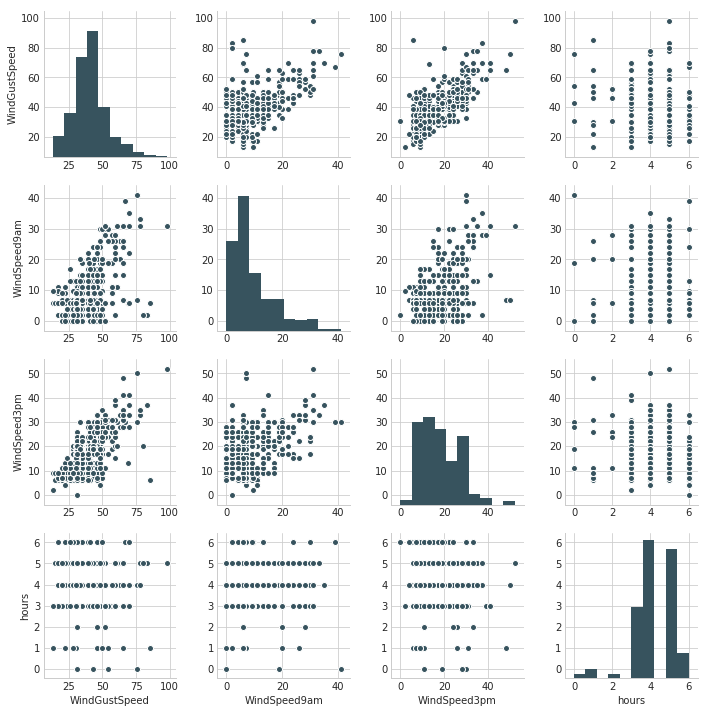

In [34]:
import seaborn as sns
%matplotlib inline

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

sns.pairplot(dataset)

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [25]:




# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [27]:
y_pred

array([ 4.13653607,  3.97356208,  4.19374637,  4.32803751,  4.28436014,
        3.57416361,  3.51056645,  4.19820461,  4.20642708,  4.27322844,
        4.22958925,  4.30538614,  4.20998108,  4.28834577,  3.85139163,
        4.41594949,  4.16459091,  4.2224376 ,  4.26170876,  3.88864675,
        4.19760361,  4.20668387,  4.10639442,  4.23571653,  4.19927544,
        4.32944976,  3.93985537,  4.3296247 ,  3.98933479,  4.33767223,
        4.04472588,  4.23571373,  3.93985537,  4.08669324,  4.11041544,
        4.26367835,  4.21926879,  4.03792403,  4.06186204,  4.30384549,
        4.07761577,  4.00601475,  4.25759474,  4.33262414,  3.70164453,
        4.24286817,  4.51770836,  4.48767612,  4.50000982,  4.16942596,
        4.33925942,  4.23704135,  4.37432914,  4.1987154 ,  4.31531861,
        4.05680559,  4.15007179,  3.88204407,  3.93077789,  3.88132025,
        3.26524214,  4.17611058,  4.16386151,  4.35330314,  4.05719077,
        4.13276905,  3.74626991,  4.15298102,  4.2314741 ,  4.20

In [28]:
import matplotlib.pyplot as plt


# Visualising the Training set results
plt.scatter(X[:,2], y, color = 'red')
#plt.plot(X[23,:], y_ped, color = 'blue')
#plt.plot(X, y_pred, color = 'blue')
plt.title('time (Training set)')
plt.xlabel('Wind speed')
plt.ylabel('Time')
plt.show()



In [29]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
wml_credentials={
    "url": "https://eu-gb.ml.cloud.ibm.com",
    "apikey": "EI6TeGWKaDBFUAK_h2hJr57TfVvd-Hx-iqioNUDVHIf5",
    "username": "3e0dc5e6-d2cd-4db5-b7d6-190168071810",
    "instance_id": "8294c367-52de-4459-9561-a49dd1efed67",
    "password": "fabe4fb3-5fab-4c6a-8af7-bab674a47a79"
}

2019-05-29 05:47:17,469 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [31]:
client=WatsonMachineLearningAPIClient(wml_credentials)
model_props={client.repository.ModelMetaNames.AUTHOR_NAME:"Abhinav",
             client.repository.ModelMetaNames.AUTHOR_EMAIL:"bajajabhinav3@gmail.com",
             client.repository.ModelMetaNames.NAME:"WindStorm"}
model_artifact=client.repository.store_model(regressor,meta_props=model_props)


published_model_uid=client.repository.get_model_uid(model_artifact)
published_model_uid
deploy=client.deployments.create(published_model_uid,name="hours")



#######################################################################################

Synchronous deployment creation for uid: '39fa4b16-8fe6-4026-85a2-66d34aa18bd0' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='0c73bbfc-780f-4606-bb6c-97dbe8676a22'
------------------------------------------------------------------------------------------------




In [32]:
scoring_endpoint=client.deployments.get_scoring_url(deploy)

In [33]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/8294c367-52de-4459-9561-a49dd1efed67/deployments/0c73bbfc-780f-4606-bb6c-97dbe8676a22/online'